# Oblig

Dette prosjektet tar for seg følgende oppgave:
Du har sett Chemikalen, og tatt opp lyden fra et mellomspill. Du ønsker å finne ut hvilke toner som ble brukt. 

For å løse dette brukes fouriertransformasjon. I denne oppgaven brukes ikke faktiske data hentet inn. Det har i stedet blitt laget data basert på partituret, som gjør at man ser bort ifra bakgrunnsstøy f.eks. fra at rekvisitter hentes av scenen og nye rekvisitter settes ut på scenen. Det blir også antatt at instrumentene var stemt riktig, og at det ble spilt med riktig intonasjon. I mellomspillet spilte ei tverrfløyte, en klarinett, to trompeter og en trombone. Det sees også bort ifra at messingen brukte mute.

### Data lages 

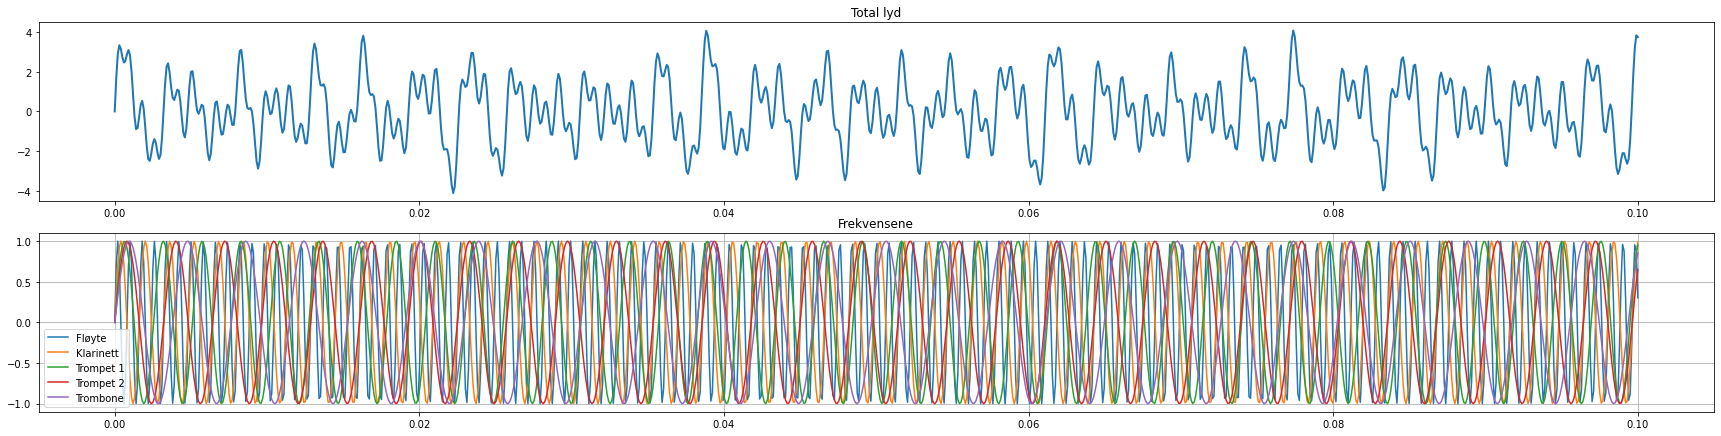

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definerer relevante funksjoner
def fløyte(t):
    return np.sin(2*np.pi*t*1244.51)

def klarinett(t):
    return np.sin(2*np.pi*t*622.25)

def trompet1(t):
    return np.sin(2*np.pi*t*392)

def trompet2(t):
    return np.sin(2*np.pi*t*311.13)

def trombone(t):
    return np.sin(2*np.pi*t*261.63)

def total_lyd(t):
    return fløyte(t) + klarinett(t) + trompet1(t) + trompet2(t) + trombone(t)

# Lager data
t1 = 0.0
T = 1/10000   # Sample spacing
N = 1000   # Sample points
t = np.linspace(t1,N*T,N)


# Plotting av alt dette
fig, ax = plt.subplots(2,1, figsize = (24,6))
fig.tight_layout()

ax[0].plot(t, total_lyd(t), linewidth=2.0, label = 'Total lyd')
ax[1].plot(t, fløyte(t), label = 'Fløyte')
ax[1].plot(t, klarinett(t), label = 'Klarinett')
ax[1].plot(t, trompet1(t), label = 'Trompet 1')
ax[1].plot(t, trompet2(t), label = 'Trompet 2')
ax[1].plot(t, trombone(t), label = 'Trombone')

ax[0].set_title('Total lyd')
ax[1].set_title('Frekvensene')

plt.legend()
plt.grid()
plt.show()



### Data analyseres

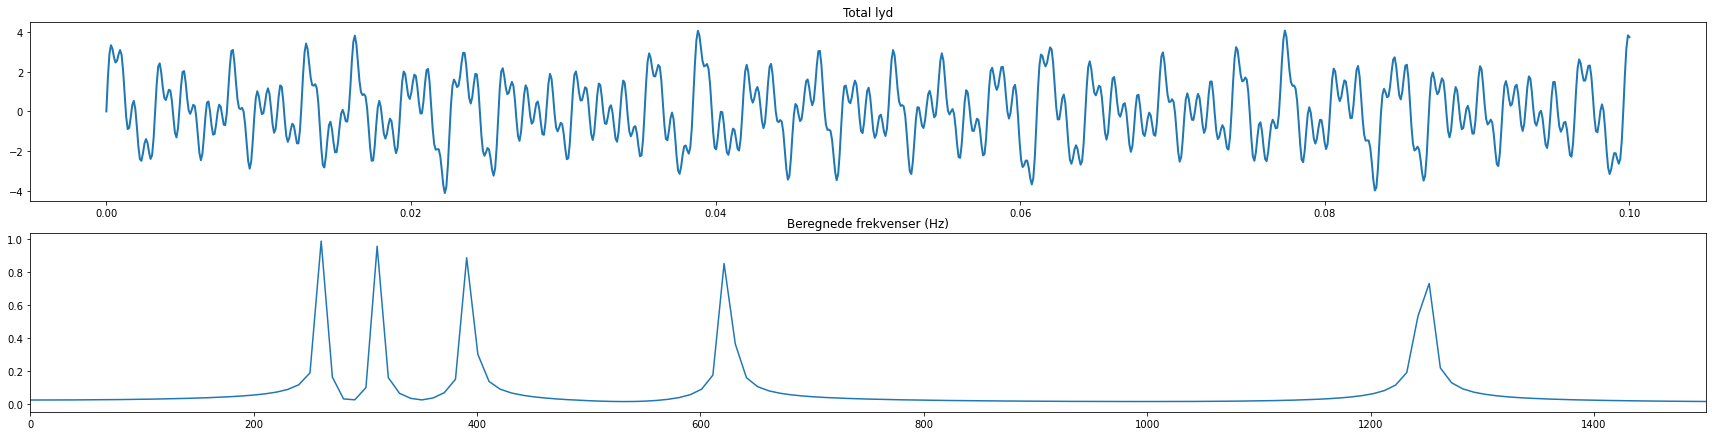

In [12]:
fouriertransformerte = np.fft.fft(total_lyd(t))
frekvenser = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)

# Plotting av alt dette
fig, ax = plt.subplots(2,1, figsize = (24,6))
fig.tight_layout()

ax[0].plot(t, total_lyd(t), linewidth=2.0, label = 'Total lyd')
ax[1].plot(frekvenser, 2.0 / N * np.abs(fouriertransformerte[0:N // 2])) 

ax[0].set_title('Total lyd')
ax[1].set_title('Beregnede frekvenser (Hz)')
plt.xlim(0,1500)
plt.show()

Fra det nederste plottet kan man se at den totale lyden (i teorien) hovedsakelig kommer fra fem ulike toner, noe som var forventet. Frekvensene som ble fanget opp var på rundt 250Hz, like over 300Hz, like under 400Hz, litt over 600Hz og rundt 1250Hz. 


De rikige tonene og frekvensene var følgende:

Fløyte Eb3 1244.51Hz

Klarinett Eb2 622.25Hz

Trompet 1 G 392Hz

Trompet 2 Eb 311.13Hz

Trombone C 261.63Hz